# Randomized CUR
for matrices in $\mathcal{M}_{m \times n}(\mathbb{R})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
from scipy.linalg.interpolative import interp_decomp

In [6]:
from scipy.misc import face

In [28]:
X = face(gray=True)
X = X.astype(float)

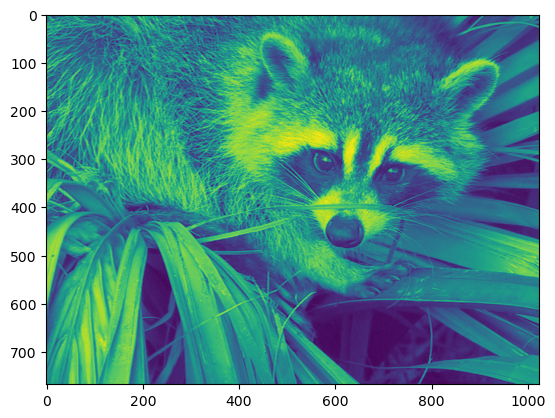

In [29]:
plt.imshow(X)

In [30]:
X

array([[114., 130., 145., ..., 119., 129., 137.],
       [ 83., 104., 123., ..., 118., 134., 146.],
       [ 68.,  88., 109., ..., 119., 134., 145.],
       ...,
       [ 98., 103., 116., ..., 144., 143., 143.],
       [ 94., 104., 120., ..., 143., 142., 142.],
       [ 94., 106., 119., ..., 142., 141., 140.]])

In [13]:
X.shape

(768, 1024)

## CUR algorithm

In [140]:
def rcur(A,k,p=0,q=0):
    m,n = A.shape
    J,X = interp_decomp(A,k)
    Js = J[0:k]
    Z = np.hstack([np.eye(k),X])
    C = A[:,Js]
    _,S,P = sp.linalg.qr(C.T,pivoting = True)
    I = P[0:k]
    R = A[I,:]
    U = Z@np.linalg.pinv(R)
    return C,U,R

In [141]:
C,U,R = rcur(X,50,0,0)

In [142]:
C.shape

(768, 50)

In [143]:
X_hat = C@U@R

In [144]:
from PIL import Image

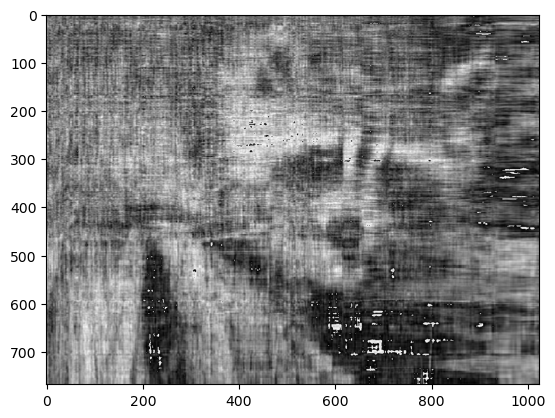

In [145]:
X_hat = X_hat.astype('int8')
image_stream = Image.fromarray(X_hat)
plt.imshow(image_stream)
plt.show()

In [146]:
E = [50,100,200,300]

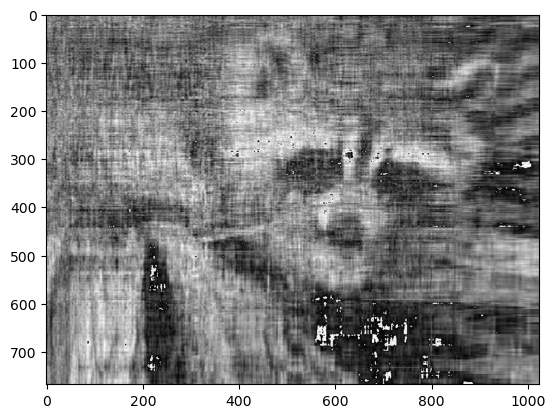

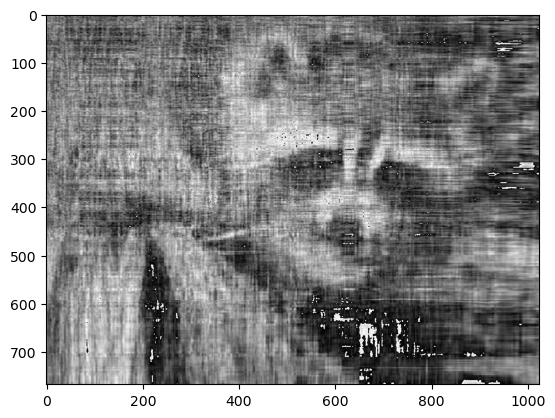

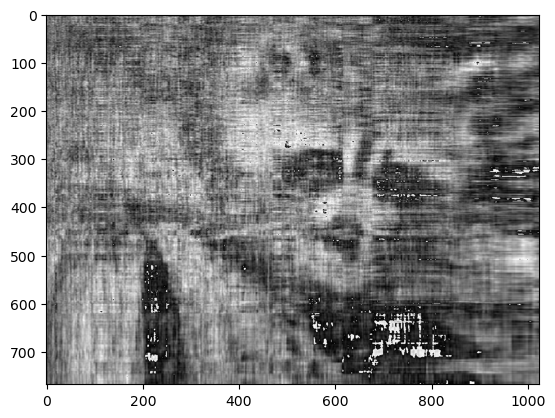

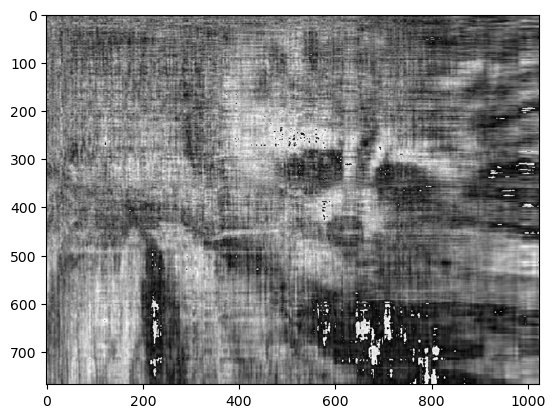

Text(0.5, 1.0, 'Relative error $\\|X-\\hat{X}\\|/\\|X\\|$')

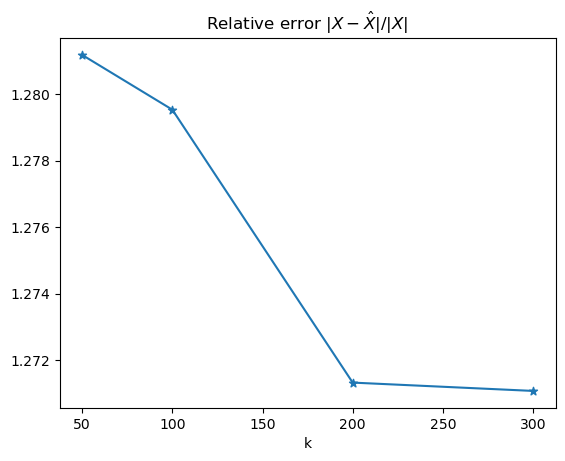

In [171]:
Err = []
for e in E:
    C,U,R = rcur(X,k,0,0)
    X_hat = C@U@R
    X_hat = X_hat.astype('int8')
    image_stream = Image.fromarray(X_hat)
    plt.imshow(image_stream)
    plt.show()
    err = np.linalg.norm(X-X_hat)/np.linalg.norm(X)
    Err.append(err)
    
plt.plot(E,Err)
plt.scatter(E,Err,marker = '*')
plt.xlabel('k')
plt.title("Relative error $\|X-\hat{X}\|/\|X\|$")

In [173]:
C.shape

(768, 50)

In [174]:
R.shape

(50, 1024)

In [172]:
from sklearn.utils.extmath import randomized_svd

In [177]:
S1,V1,D1 = randomized_svd(C,768,random_state = None)
S2,V2,D2 = randomized_svd(R,50,random_state = None)

In [179]:
x = np.linspace(1,50,50)

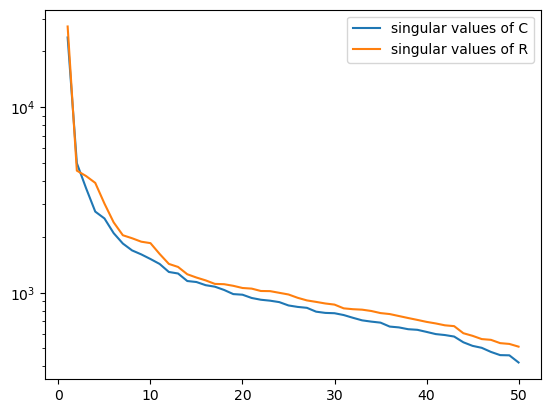

In [181]:
plt.plot(x,V1, label = "singular values of C")
plt.plot(x,V2, label = "singular values of R")
plt.yscale('log')
plt.legend()

## Alternative

In [182]:
def rand_cur(A,k,p,q):
    G = np.random.randn(k+p,m)
    Y = G@A
    for i in range(q):
        Z = Y@A.T
        Y = Z@A
    Js, Z = interp_decomp(Y,k)
    Js = Js[0:k]
    Z = np.hstack([np.eye(k),Z])
    Is,_ = interp_decomp(A[:,Js].T,k)
    Is = Is[0:k]
    U = Z@np.linalg.pinv(A[Is,:])
    R = A[Is,:]
    C = A[:,Js]
    return C,U,R

In [183]:
C,U,R = rand_cur(X,700,10,10)

In [184]:
X_hat = C@U@R

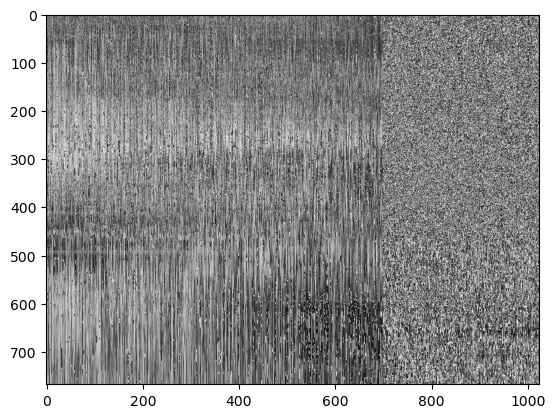

In [185]:
X_hat = X_hat.astype('int8')
image_stream = Image.fromarray(X_hat)
plt.imshow(image_stream)
plt.show()